In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import warnings
from folium.plugins import MarkerCluster

warnings.filterwarnings("ignore")




# **Loading the dataset**

In [2]:

df = pd.read_csv('/content/rides 2.csv')

# **Exploring the Data**

In [3]:

print(df.describe())

       pick_up_lat  pick_up_lng  drop_off_lat  drop_off_lng  pickup_cluster  \
count  4768.000000  4768.000000   4768.000000   4768.000000     4768.000000   
mean     24.878121    67.070470     24.873318     67.069657        1.074874   
std       0.046405     0.036750      0.048008      0.040131        0.834824   
min      24.755700    66.984200     24.753300     66.977400       -1.000000   
25%      24.830700    67.050775     24.830100     67.041400        1.000000   
50%      24.878400    67.064300     24.872350     67.064200        1.000000   
75%      24.915250    67.076700     24.909700     67.075600        1.000000   
max      25.021800    67.264900     25.049400     67.264900        9.000000   

       dropoff_cluster  pickup_hour  distance_km  
count      4768.000000  4768.000000  4768.000000  
mean          0.138842     9.675336     7.722152  
std           0.702133     5.238219     4.367168  
min          -1.000000     0.000000     0.000000  
25%           0.000000     5.0000

In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4768 entries, 0 to 4767
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   user_id           4768 non-null   object 
 1   ride_id           4768 non-null   object 
 2   pickup_datetime   4768 non-null   object 
 3   pick_up           4768 non-null   object 
 4   pick_up_lat       4768 non-null   float64
 5   pick_up_lng       4768 non-null   float64
 6   pick_up_geohash   4768 non-null   object 
 7   drop_off          4768 non-null   object 
 8   drop_off_lat      4768 non-null   float64
 9   drop_off_lng      4768 non-null   float64
 10  drop_off_geohash  4768 non-null   object 
 11  pickup_cluster    4768 non-null   int64  
 12  dropoff_cluster   4768 non-null   int64  
 13  pickup_hour       4768 non-null   int64  
 14  distance_km       4768 non-null   float64
 15  time_of_day       4768 non-null   object 
dtypes: float64(5), int64(3), object(8)
memory 

# **Data Preprocessing and Feature Engineering:**

In [5]:
print(df.isnull().sum())

user_id             0
ride_id             0
pickup_datetime     0
pick_up             0
pick_up_lat         0
pick_up_lng         0
pick_up_geohash     0
drop_off            0
drop_off_lat        0
drop_off_lng        0
drop_off_geohash    0
pickup_cluster      0
dropoff_cluster     0
pickup_hour         0
distance_km         0
time_of_day         0
dtype: int64


In [6]:
df.drop_duplicates(inplace=True)

print(f"Number of rows after dropping duplicates: {len(df)}")

Number of rows after dropping duplicates: 4768


In [7]:
print(type(df))

<class 'pandas.core.frame.DataFrame'>


In [8]:
print(df.head())

      user_id                           ride_id      pickup_datetime  \
0  cfecdb276f  859b787c0c67a40eca6cb86263480322  2013-06-25 05:08:20   
1  6f4922f455  3ad6b9ebc7e246b76d27d75360326f34  2013-07-05 21:53:20   
2  c6dfc6b7c6  ca3db606e7ae5824ae3b5f9009ea9bdc  2013-07-30 05:08:20   
3  c6dfc6b7c6  85feeafe20f4ba8fabbed893829b87a6  2013-08-01 01:53:20   
4  c6dfc6b7c6  e82055b355853a5addad0a04eab5af5f  2013-08-16 02:23:20   

                                             pick_up  pick_up_lat  \
0     Jinnah International Airport - Karachi - Sindh      24.9005   
1  Shalimar Estate Apartments - Block 5 - Clifton...      24.8160   
2  KHI Arrivals: Jinnah International Airport - K...      24.9002   
3  Shoaib Plaza - Near Abid Town - Gulshan-e-Iqba...      24.9237   
4  Shoaib Plaza - Near Abid Town - Gulshan-e-Iqba...      24.9237   

   pick_up_lng pick_up_geohash  \
0      67.1682    tkrv8kyretd5   
1      67.0291    tkrtjm956k9x   
2      67.1682    tkrv8kyqkdxr   
3      67.0835  

In [9]:
df.describe()

,pick_up_lat,pick_up_lng,drop_off_lat,drop_off_lng,pickup_cluster,dropoff_cluster,pickup_hour,distance_km
count,4768.000000,4768.000000,4768.000000,4768.000000,4768.000000,4768.000000,4768.000000,4768.000000
mean,24.878121,67.070470,24.873318,67.069657,1.074874,0.138842,9.675336,7.722152
std,0.046405,0.036750,0.048008,0.040131,0.834824,0.702133,5.238219,4.367168
min,24.755700,66.984200,24.753300,66.977400,-1.000000,-1.000000,0.000000,0.000000
25%,24.830700,67.050775,24.830100,67.041400,1.000000,0.000000,5.000000,4.584392
50%,24.878400,67.064300,24.872350,67.064200,1.000000,0.000000,10.000000,6.783546
75%,24.915250,67.076700,24.909700,67.075600,1.000000,0.000000,14.000000,10.769154
max,25.021800,67.264900,25.049400,67.264900,9.000000,8.000000,23.000000,25.255300


In [10]:
df.shape

(4768, 16)

In [11]:
df.isnull().sum()

,0
user_id,0
ride_id,0
pickup_datetime,0
pick_up,0
pick_up_lat,0
pick_up_lng,0
pick_up_geohash,0
drop_off,0
drop_off_lat,0
drop_off_lng,0


# **Feature Engineering**

In [12]:
df['lat_diff'] = df['drop_off_lat'] - df['pick_up_lat']
df['lng_diff'] = df['drop_off_lng'] - df['pick_up_lng']
df = pd.get_dummies(df, columns=['time_of_day'], drop_first=True)


# **Histograms of numerical features**

This  histograms provides insights into the distributions of various ride features. The top row shows the distributions of pickup latitude and longitude, and dropoff latitude and longitude, indicating the geographical spread of ride origins and destinations. The middle left histogram displays the distribution of dropoff longitude, while the middle center shows the distribution of ride distances in kilometers. Finally, the bottom right histogram reveals the distribution of pickup hours throughout the day, highlighting periods of higher and lower ride demand. Each histogram includes a kernel density estimate line to help visualize the shape of the distribution.

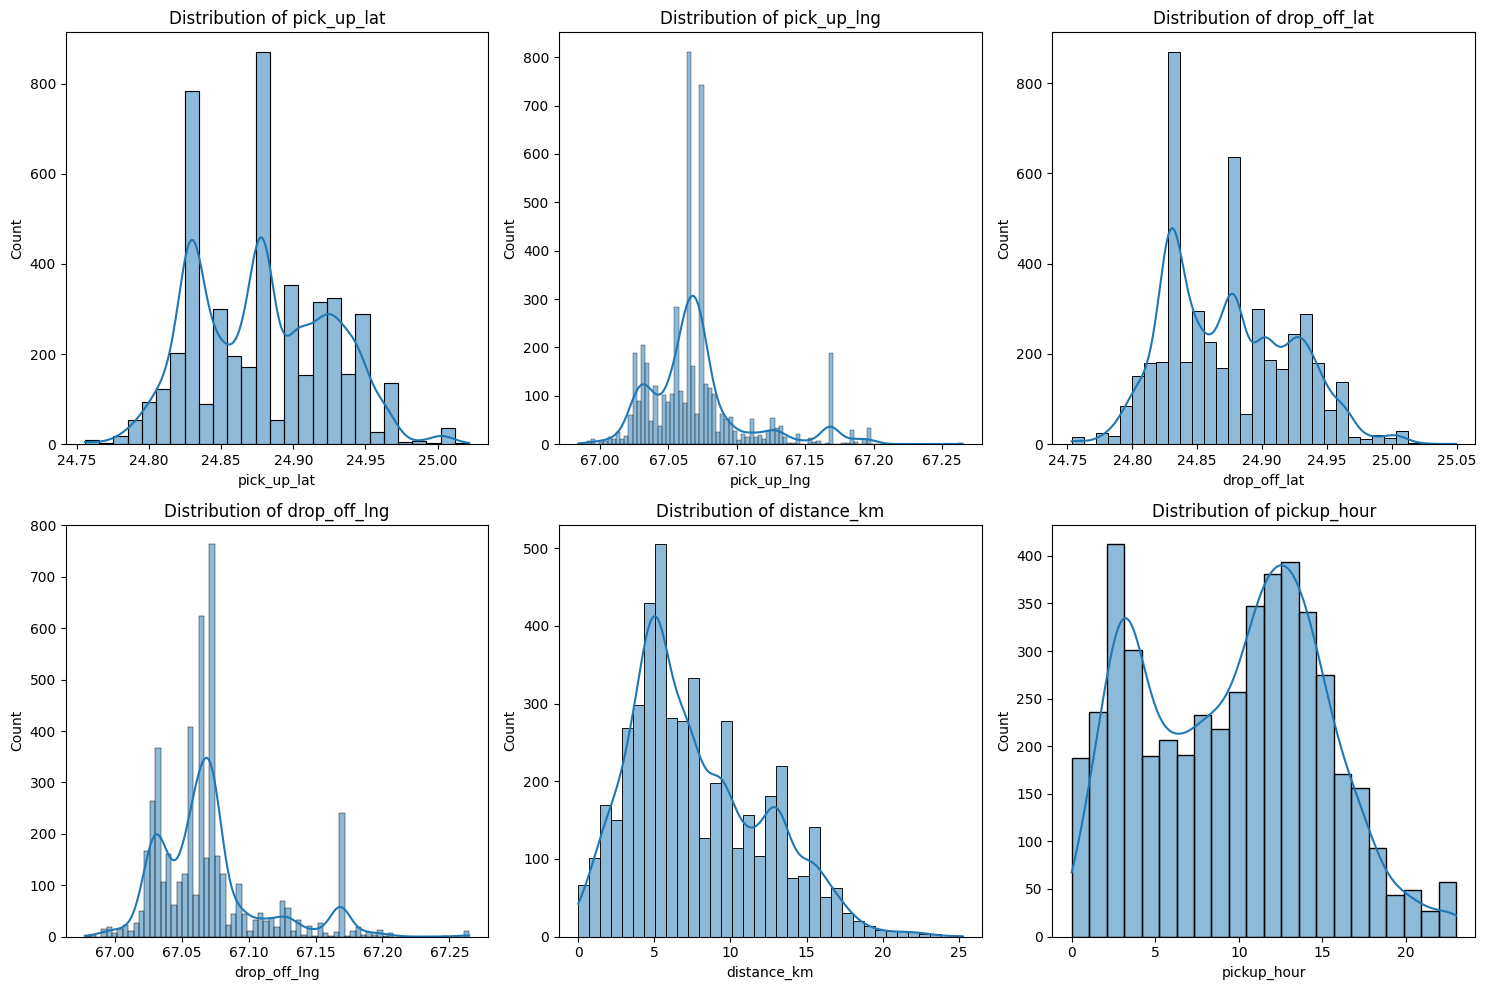

In [13]:
numerical_features = ['pick_up_lat', 'pick_up_lng', 'drop_off_lat', 'drop_off_lng', 'distance_km', 'pickup_hour']
plt.figure(figsize=(15, 10))
for i, feature in enumerate(numerical_features):
    plt.subplot(2, 3, i + 1)
    sns.histplot(df[feature], kde=True)
    plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()

# **Scatter Plot: Pickup Latitude vs. Longitude**

This scatter plot visualizes the geographic distribution of ride pickups, plotting the pickup longitudes against the pickup latitudes. Each orange dot represents a single pickup location. The plot shows a dense cluster of pickup points concentrated in a certain area, indicating a high demand for rides in that specific region. There are also several scattered pickup locations further away from this main cluster, suggesting less frequent ride origins in those areas.

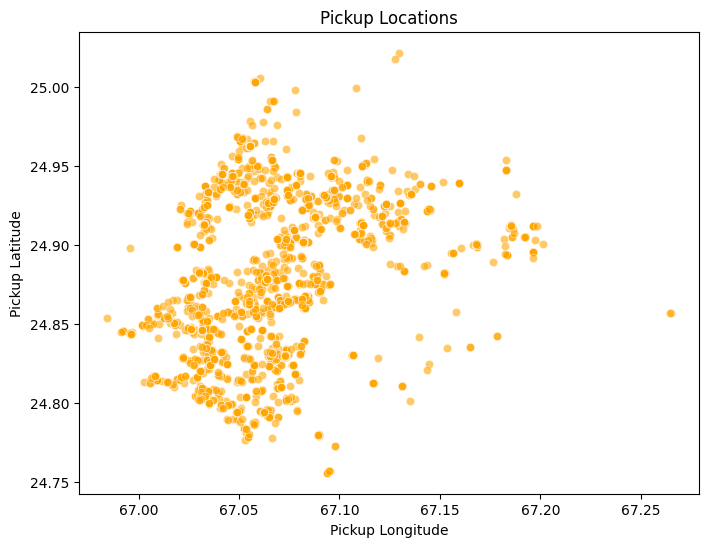

In [14]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='pick_up_lng', y='pick_up_lat', data=df, alpha=0.6, color='orange')
plt.title('Pickup Locations')
plt.xlabel('Pickup Longitude')
plt.ylabel('Pickup Latitude')
plt.show()


# **Count plots for categorical features**

 This show the distribution of pickup and dropoff locations, categorized into clusters. For both pickups and dropoffs, cluster 1 has a significantly higher count compared to all other clusters. This suggests that a large proportion of ride activity starts and ends within this particular geographical area or cluster, while the other clusters represent areas with much less frequent pickup and dropoff activity.

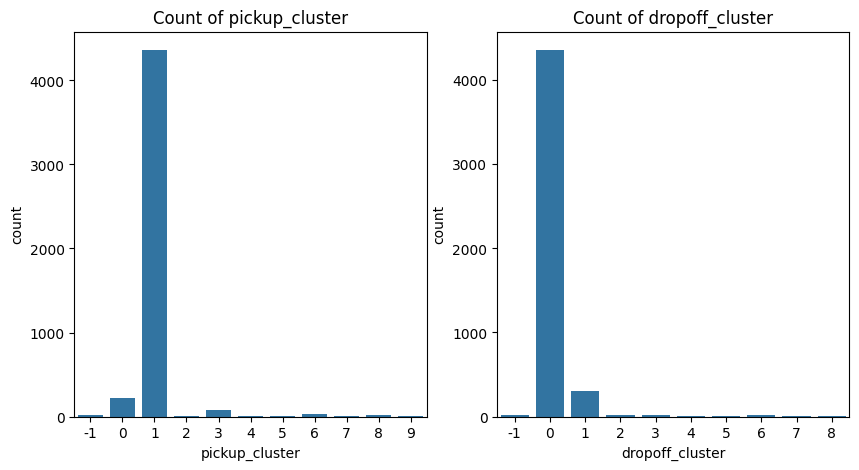

In [15]:
categorical_features = ['pickup_cluster', 'dropoff_cluster']
plt.figure(figsize=(10, 5))
for i, feature in enumerate(categorical_features):
    plt.subplot(1, 2, i + 1)
    sns.countplot(x=feature, data=df)
    plt.title(f'Count of {feature}')
plt.show()

# **Define a function to categorize hours into time of day**

In [16]:
def categorize_time_of_day(hour):
    if 5 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 17:
        return 'Afternoon'
    elif 17 <= hour < 21:
        return 'Evening'
    else:
        return 'Night'

df['time_of_day'] = df['pickup_hour'].apply(categorize_time_of_day)

print(df[['pickup_hour', 'time_of_day']].head())


   pickup_hour time_of_day
0            5     Morning
1           21       Night
2            5     Morning
3            1       Night
4            2       Night


# **Bar Chart: Ride Counts by Time of Day**

This bar chart illustrates the total number of rides recorded during different times of the day: Morning, Afternoon, Night, and Evening. We can observe that the Morning has the highest number of rides, followed by the Afternoon. The number of rides decreases significantly during the Night, and the Evening shows the fewest rides among the four time periods.

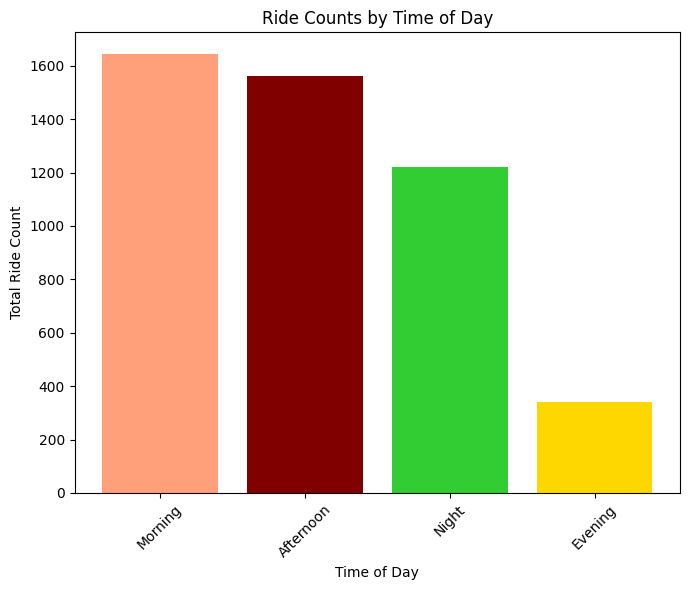

In [17]:
time_of_day_counts = df['time_of_day'].value_counts().reset_index()
time_of_day_counts.columns = ['time_of_day', 'ride_count']

plt.figure(figsize=(7, 6))

colors = ['lightsalmon', 'maroon', 'limegreen', 'gold', 'lightcoral', 'mediumpurple']  # You can customize this list


plt.bar(time_of_day_counts['time_of_day'], time_of_day_counts['ride_count'], color=colors[:len(time_of_day_counts)])

plt.title('Ride Counts by Time of Day')
plt.xlabel('Time of Day')
plt.ylabel('Total Ride Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# **Bar Chart: Average Distance by Time of Day**

The bar chart displays the average distance traveled (in kilometers) across different times of the day: Afternoon, Evening, Morning, and Night. Looking at the heights of the bars, we can see that, on average, the longest distances appear to be covered during the Night, followed by the Evening. The Afternoon and Morning show slightly shorter average distances traveled compared to the latter parts of the day.

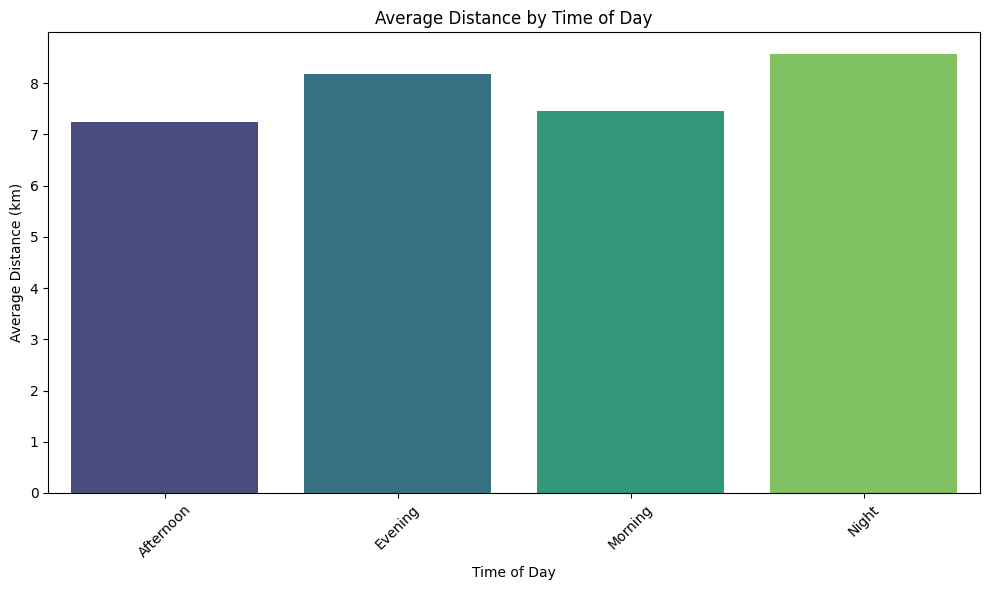

In [18]:
avg_distance_by_time = df.groupby('time_of_day')['distance_km'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='time_of_day', y='distance_km', data=avg_distance_by_time, palette='viridis')
plt.title('Average Distance by Time of Day')
plt.xlabel('Time of Day')
plt.ylabel('Average Distance (km)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# **Bar Chart: Average Distance per Cluster (Pickup)**

The bar chart displays the average ride distance for each pickup cluster. Pickup cluster 9 has the highest average distance at around 15 km, followed closely by clusters 2 and 3. On the other hand, cluster 5 has the shortest average distance, just over 5 km. This indicates that some pickup areas are associated with much longer rides, while others typically involve shorter travel distances.

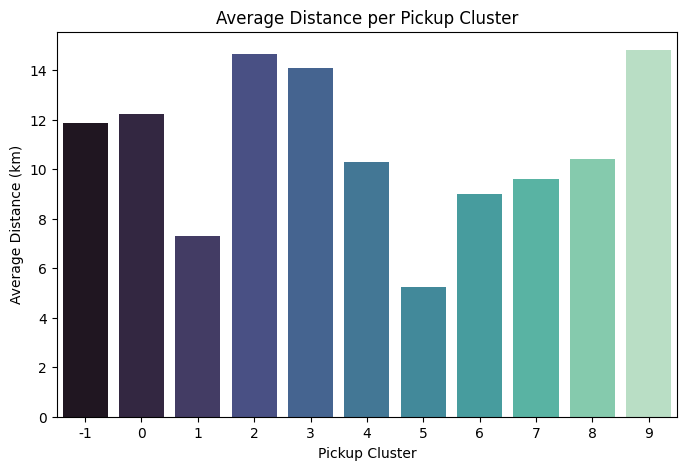

In [19]:
avg_distance_pickup = df.groupby('pickup_cluster')['distance_km'].mean().reset_index()
plt.figure(figsize=(8, 5))
sns.barplot(x='pickup_cluster', y='distance_km', data=avg_distance_pickup, palette='mako')
plt.title('Average Distance per Pickup Cluster')
plt.xlabel('Pickup Cluster')
plt.ylabel('Average Distance (km)')
plt.show()


# **Bar Chart: Average Distance per Cluster (Dropoff)**

The bar chart shows the average ride distance for each dropoff cluster. Cluster 8 has the highest average distance, around 20 km, followed by clusters 6 and 7 with distances of about 18 km and 15 km, respectively. In contrast, clusters 0, 3, and 5 have the shortest average distances, all below 8 km. This suggests that certain dropoff areas are linked to longer trips, while others are typically close to the pickup points.

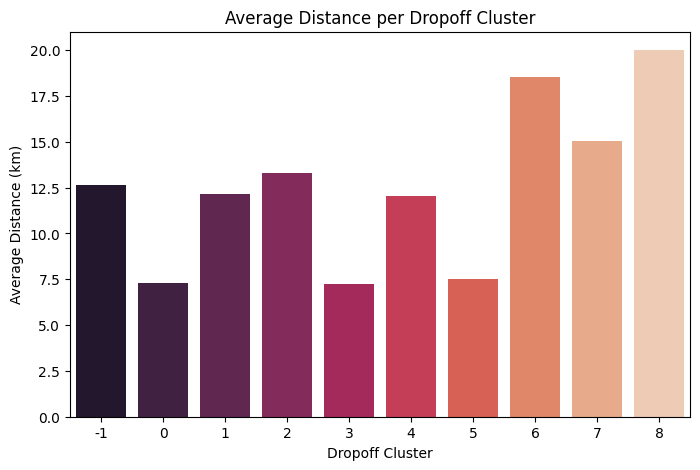

In [20]:
avg_distance_dropoff = df.groupby('dropoff_cluster')['distance_km'].mean().reset_index()
plt.figure(figsize=(8, 5))
sns.barplot(x='dropoff_cluster', y='distance_km', data=avg_distance_dropoff, palette='rocket')
plt.title('Average Distance per Dropoff Cluster')
plt.xlabel('Dropoff Cluster')
plt.ylabel('Average Distance (km)')
plt.show()

# **Bar Chart: Distribution of Ride Counts per User**
This histogram shows the distribution of ride counts per user, highlighting how frequently customers use the ride-hailing service. Most users take only a few rides, while fewer users have a high ride frequency. This pattern suggests that many customers may be occasional users and could be at risk of churning. Identifying these low-engagement users can help the ride-hailing service implement retention strategies, such as targeted promotions or improved service quality, to encourage repeat usage and reduce churn.

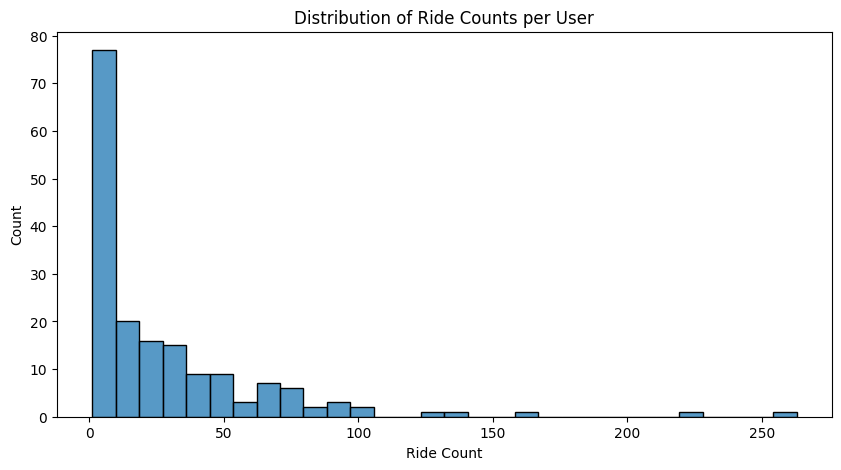

In [21]:

if 'user_id' in df.columns:
    user_ride_counts = df['user_id'].value_counts()
    plt.figure(figsize=(10, 5))
    sns.histplot(user_ride_counts, bins=30)
    plt.title('Distribution of Ride Counts per User')
    plt.xlabel('Ride Count')
    plt.show()


# **Pie Chart: Distribution of Rides by Time of Day**

The pie chart shows that most rides happen in the morning (34.5%) and afternoon (32.8%), making these the busiest times of day. In contrast, the evening has the fewest rides, with only 7.2%, while night accounts for 25.6%. This suggests that people mostly use the service during work hours and less in the evening.

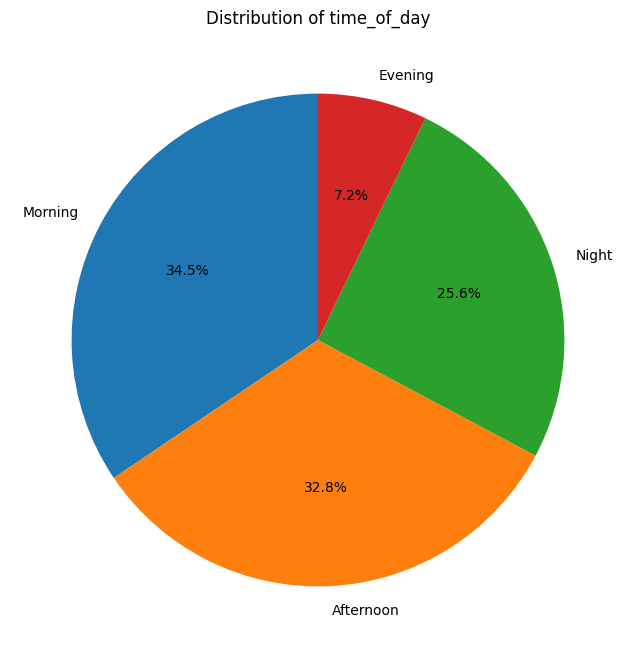

In [22]:
plt.figure(figsize=(8, 8))
df['time_of_day'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90)
plt.title('Distribution of time_of_day')
plt.ylabel('')
plt.show()

# **Correlation matrix**

 shows how different ride-related features are related to each other. It compares values like pickup and drop-off locations (latitude and longitude), ride distance, and pickup hour. The colors represent how strongly two features are connected — red means a strong positive relationship, blue means a negative one, and light colors mean weak or no relationship.

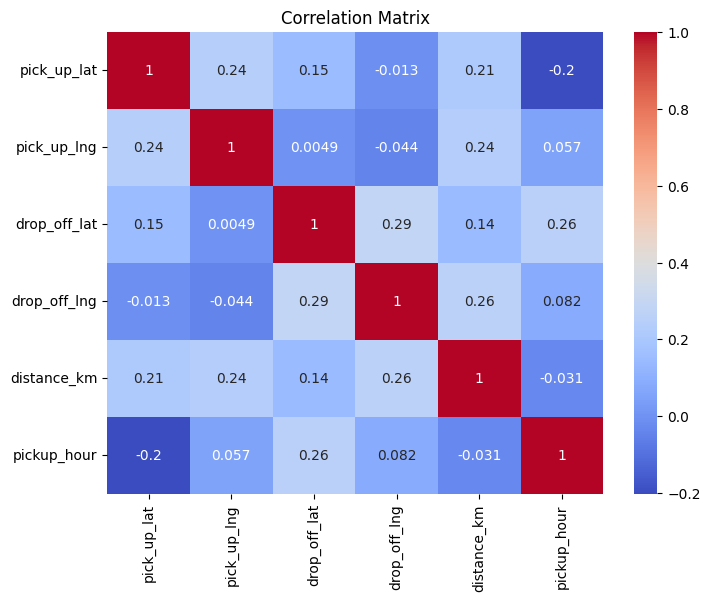

In [23]:

correlation_matrix = df[numerical_features].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# **Violin Plots: Lat/Lng Differences**

These plots show how far customers usually travel in terms of latitude and longitude during their rides. Most rides have small changes in location, meaning many trips are short and within the same area. In relation to customer churn, this could suggest that customers who take short, routine trips may be more likely to stay loyal, while those with unusual or long-distance trips might be testing the service or switching to alternatives. Understanding these travel patterns can help identify which customers are at risk of churning based on how they use the service.

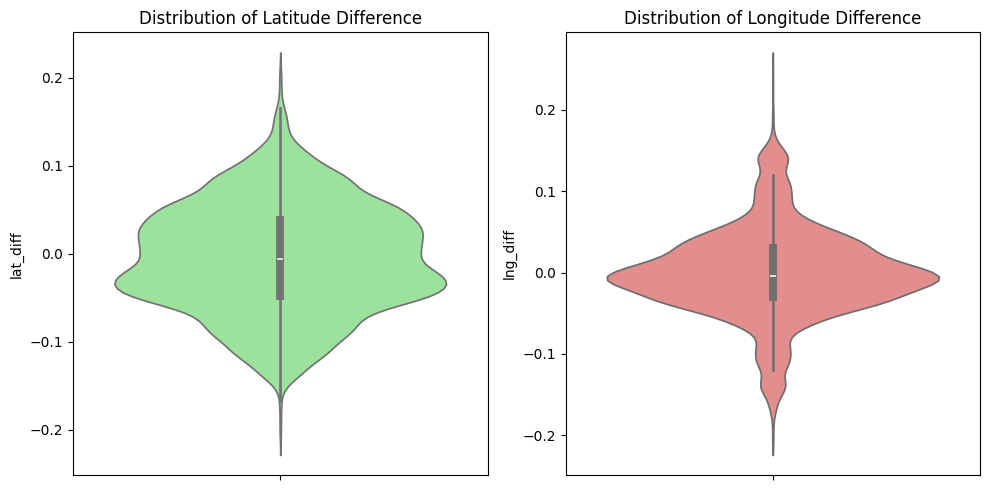

In [24]:

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.violinplot(y='lat_diff', data=df, color='lightgreen')
plt.title('Distribution of Latitude Difference')
plt.subplot(1, 2, 2)
sns.violinplot(y='lng_diff', data=df, color='lightcoral')
plt.title('Distribution of Longitude Difference')
plt.tight_layout()
plt.show()

# **Violin Plot for Dropoff Cluster**

# **1.   Pickup Cluster**
This violin plot shows the distribution of travel distances across different pickup clusters in the ride-hailing dataset. It highlights variations in trip lengths depending on pickup locations, with some clusters having a wider spread, indicating more variability in ride distances. The central portion of each plot represents the most common travel range, helping to identify typical ride behaviors.







# **2.  Dropoff Cluster**
violin plot illustrates the distribution of travel distances across different dropoff clusters in the ride-hailing dataset. The wider sections show where most trips fall, indicating common ride distances for specific dropoff locations. The central boxplot highlights the typical range of travel, helping identify areas with shorter or longer rides. Understanding these patterns can provide insights into dropoff trends and customer behaviors, which are important for improving service efficiency and retention strategies







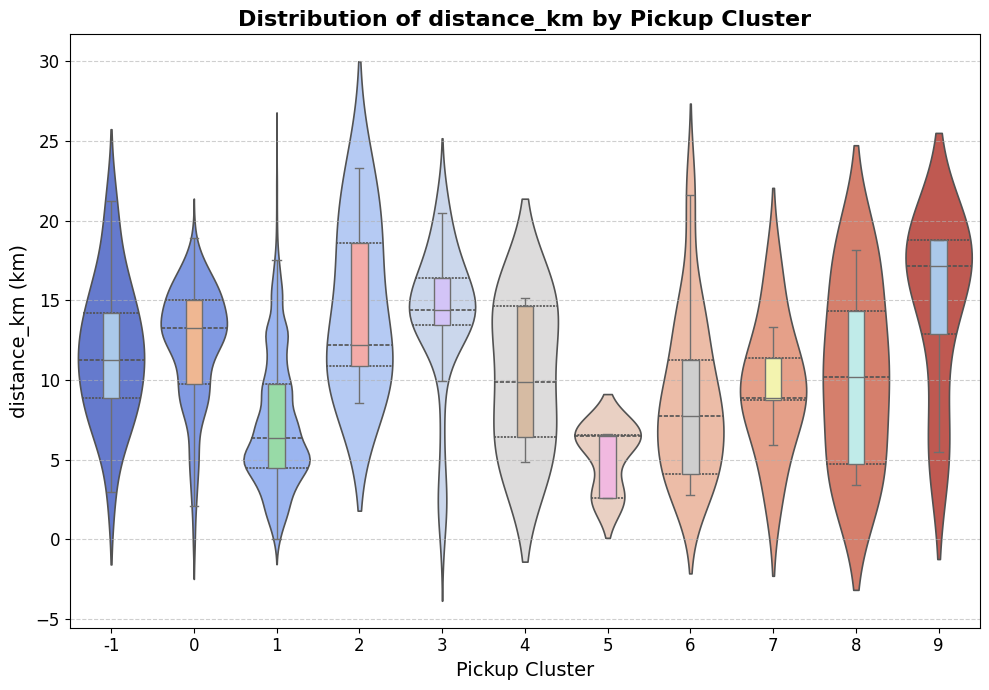

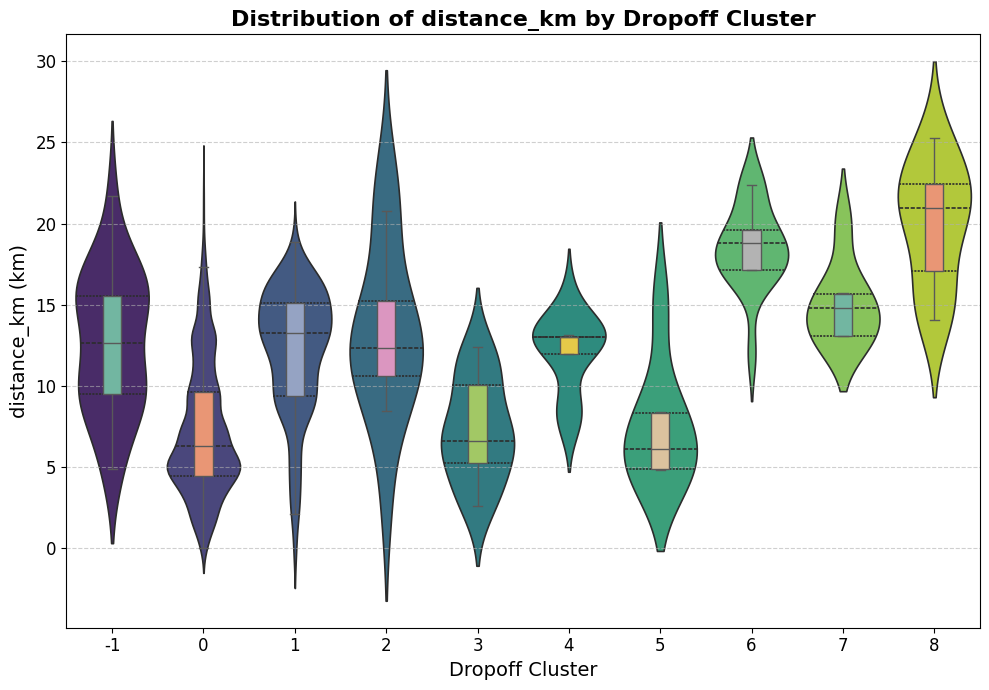

In [25]:

if 'distance_km' in df.columns and 'pickup_cluster' in df.columns and 'dropoff_cluster' in df.columns:
    numerical_features = ['distance_km']

    for feature in numerical_features:

        plt.figure(figsize=(10, 7))
        sns.violinplot(x='pickup_cluster', y=feature, data=df, palette='coolwarm', inner="quartile", linewidth=1.2)
        sns.boxplot(x='pickup_cluster', y=feature, data=df, palette="pastel", width=0.2, showfliers=False, boxprops={'zorder': 2})
        plt.title(f'Distribution of {feature} by Pickup Cluster', fontsize=16, weight='bold')
        plt.xlabel('Pickup Cluster', fontsize=14)
        plt.ylabel(f'{feature} (km)', fontsize=14)
        plt.xticks(fontsize=12)
        plt.yticks(fontsize=12)
        plt.grid(axis='y', linestyle='--', alpha=0.6)
        plt.tight_layout()
        plt.show()


        plt.figure(figsize=(10, 7))
        sns.violinplot(x='dropoff_cluster', y=feature, data=df, palette='viridis', inner="quartile", linewidth=1.2)
        sns.boxplot(x='dropoff_cluster', y=feature, data=df, palette="Set2", width=0.2, showfliers=False, boxprops={'zorder': 2})
        plt.title(f'Distribution of {feature} by Dropoff Cluster', fontsize=16, weight='bold')
        plt.xlabel('Dropoff Cluster', fontsize=14)
        plt.ylabel(f'{feature} (km)', fontsize=14)
        plt.xticks(fontsize=12)
        plt.yticks(fontsize=12)
        plt.grid(axis='y', linestyle='--', alpha=0.6)
        plt.tight_layout()
        plt.show()

# **# Boxplot for Pickup Cluster**

# **1.   Pickup Cluster**
The box plot shows how ride distances vary by pickup cluster. Each box's height indicates the spread of distances, the line inside is the median distance, and the dots are outliers. Different pickup clusters have different typical ride lengths and variability.



# **2.   Dropoff Cluster**
This box plot illustrates how ride distances differ based on the dropoff cluster. Each box displays the distribution of distances for rides ending in that cluster, with the internal line representing the median distance. The spread of each box and the length of the whiskers indicate the variability in ride distances for that dropoff cluster, while individual points show outliers. We can see that certain dropoff clusters, like cluster 8, tend to have longer median ride distances compared to others, such as cluster 5. The variability in distances also differs across clusters, suggesting diverse trip patterns ending in various locations.



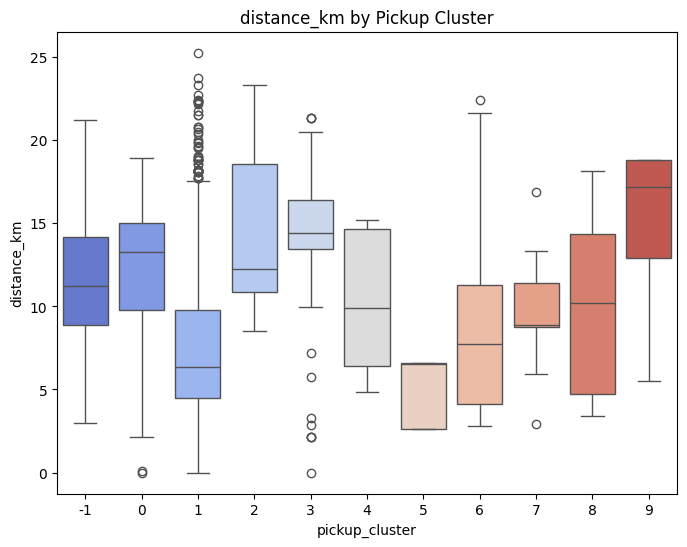

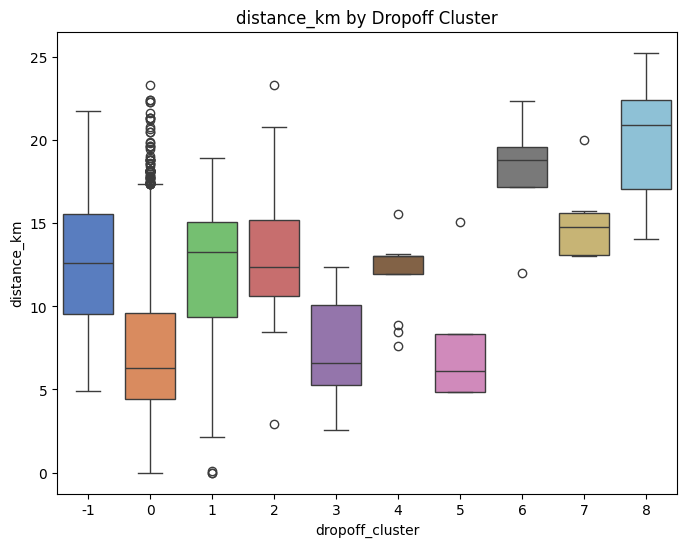

In [26]:

    plt.figure(figsize=(8, 6))
    sns.boxplot(x='pickup_cluster', y=feature, data=df, palette='coolwarm')
    plt.title(f'{feature} by Pickup Cluster')
    plt.show()

    plt.figure(figsize=(8, 6))
    sns.boxplot(x='dropoff_cluster', y=feature, data=df, palette='muted')
    plt.title(f'{feature} by Dropoff Cluster')
    plt.show()


# **Feature Selection**




Users with a negative dropoff cluster are considered churned.

In [27]:


df['churn'] = np.where(df['dropoff_cluster'] == -1, 1, 0)


# **Selecting features and target**

In [28]:

time_features = [col for col in df.columns if 'time_of_day_' in col]

features = ['pick_up_lat', 'pick_up_lng', 'drop_off_lat', 'drop_off_lng',
            'pickup_cluster', 'pickup_hour', 'distance_km', 'lat_diff', 'lng_diff'] + time_features


In [29]:

features = ['pick_up_lat', 'pick_up_lng', 'drop_off_lat', 'drop_off_lng',
            'pickup_cluster', 'pickup_hour', 'distance_km', 'lat_diff', 'lng_diff'] + [col for col in df.columns if 'time_of_day_' in col]
target = 'churn'

X = df[features]
y = df[target]

# **Horizontal Bar Chart Feature Importance**

displays the relative importance of different features in predicting a particular outcome. The length of each bar indicates the magnitude of the feature's importance, and the direction (positive or negative) suggests the nature of its influence. For instance, "time_of_day_Morning" and "lng_diff" appear to be the most positively influential features, while "pick_up_lng", "time_of_day_Night", and "time_of_day_Evening" have a notable negative influence. Features with bars closer to zero have a weaker impact on the prediction.




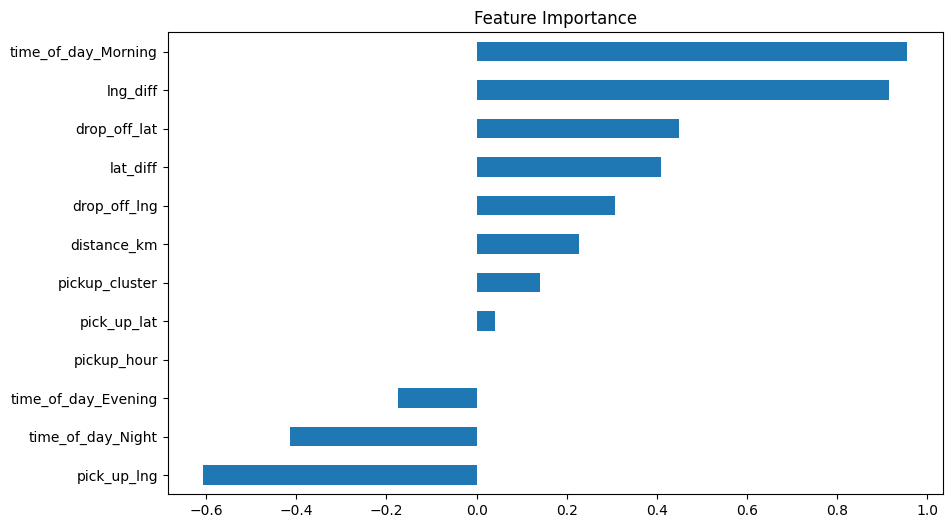

In [34]:
coefficients = model.coef_[0]
feature_importance = pd.Series(coefficients, index=features)
feature_importance.sort_values().plot(kind='barh', figsize=(10, 6), title='Feature Importance')
plt.show()

# **Spliting data into training and testing sets**

In [32]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# **Training the Logistic Regression model**
LogisticRegression(max_iter=1000) creates a tool for predicting "yes" or "no" outcomes (like churn). The max_iter=1000 part tells this tool to try up to 1000 times to learn the best way to make these predictions from your data. It's like giving it a limit on how many attempts it can make to find the right answer.

In [33]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

# **Confusion Matrix and Classification Report**

# **Predicting and evaluating the model**

In [35]:
y_pred = model.predict(X_test)

Shows how well a model predicted customer churn (where 1 means the customer churned and 0 means they did not).

In [36]:
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")

Confusion Matrix:
 [[952   0]
 [  2   0]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       952
           1       0.00      0.00      0.00         2

    accuracy                           1.00       954
   macro avg       0.50      0.50      0.50       954
weighted avg       1.00      1.00      1.00       954

Accuracy: 0.9979035639412998


# **Visualize Confusion Matrix**

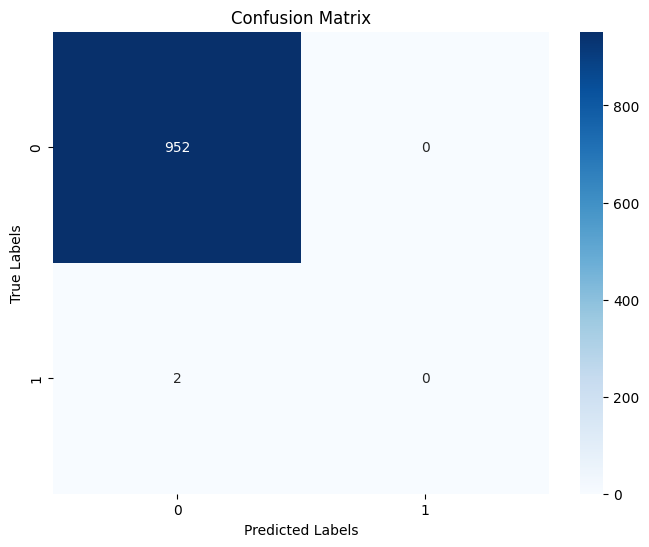

In [37]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# **Training the Logistic Regression Model**

In [38]:
import joblib

In [39]:
joblib.dump(model, 'logistic_churn_model.pkl')
joblib.dump(features, 'features_list.pkl')


['features_list.pkl']

In [40]:
print(" Model saved successfully as 'logistic_churn_model.pkl'")

 Model saved successfully as 'logistic_churn_model.pkl'


# **Installing Dependencies**

In [41]:
!pip install streamlit ngrok pyngrok


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.8/9.8 MB 81.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 59.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 110.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 7.9 MB/s eta 0:00:00


## **Uploading CSV File**

In [42]:
from google.colab import files
uploaded = files.upload()


Saving nyakego_cab.ipynb to nyakego_cab.ipynb


# **Seting Up Streamlit App**

In [43]:
%%writefile app.py
import streamlit as st
import joblib
import numpy as np


model = joblib.load('logistic_churn_model.pkl')
features_list = joblib.load('features_list.pkl')

st.title("Ride Churn Prediction")


pick_up_lat = st.number_input("Pickup Latitude")
pick_up_lng = st.number_input("Pickup Longitude")
drop_off_lat = st.number_input("Dropoff Latitude")
drop_off_lng = st.number_input("Dropoff Longitude")
pickup_cluster = st.number_input("Pickup Cluster", value=0)
pickup_hour = st.slider("Pickup Hour", 0, 23, 12)
distance_km = st.number_input("Distance (km)")
lat_diff = drop_off_lat - pick_up_lat
lng_diff = drop_off_lng - pick_up_lng


time_of_day = "Morning"
time_of_day = st.selectbox("Time of Day", ['Morning', 'Afternoon', 'Evening', 'Night'])


time_cols = {col: 0 for col in features_list if "time_of_day_" in col}
if f"time_of_day_{time_of_day}" in time_cols:
    time_cols[f"time_of_day_{time_of_day}"] = 1

input_data = [pick_up_lat, pick_up_lng, drop_off_lat, drop_off_lng,
              pickup_cluster, pickup_hour, distance_km, lat_diff, lng_diff]

input_data += [time_cols[col] for col in features_list if "time_of_day_" in col]

if st.button("Predict Churn"):
    prediction = model.predict([input_data])
    st.success(f"Prediction: {'Churn' if prediction[0] == 1 else 'No Churn'}")


Writing app.py


# **Streamlit and Pyngrok Installation**

In [44]:
!pip install streamlit
!pip install pyngrok


# **Run Streamlit App with ngrok**

In [ ]:
!ngrok authtoken 2vlCztnBnqI2GhqrxpVRbbNg4vJ_7M8EnETxrR349e28TixXP
import time
time.sleep(5)
from pyngrok import ngrok


public_url = ngrok.connect(addr='8501')
print("Streamlit URL:", public_url)


!streamlit run app.py &
sleep.time(5)

Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml
Streamlit URL: NgrokTunnel: "https://5448-34-125-125-169.ngrok-free.app" -> "http://localhost:8501"



  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://34.125.125.169:8501

